<a href="https://colab.research.google.com/github/pranavpatil450/Loan-Prediction/blob/main/Loan_Predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Dataset.csv')

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
data.shape

(614, 13)

In [ ]:
print("No.of rows",data.shape[0])
print("No. of columns",data.shape[1])

No.of rows 614
No. of columns 13


**Handling Missing Value**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
data.isnull().sum()*100/len(data)

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [ ]:
#dropping missing values which are less than 5% and filling missing values which are greater than 5% like credit_History

In [ ]:
data = data.drop('Loan_ID',axis=1)

In [ ]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [ ]:
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [ ]:
data = data.dropna(subset=columns)

In [ ]:
data.isnull().sum()*100/len(data)

,0
Gender,0.000000
Married,0.000000
Dependents,0.000000
Education,0.000000
Self_Employed,5.424955
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,0.000000
Loan_Amount_Term,0.000000
Credit_History,8.679928


In [ ]:
data['Self_Employed']= data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [ ]:
data.isnull().sum()*100/len(data)

,0
Gender,0.000000
Married,0.000000
Dependents,0.000000
Education,0.000000
Self_Employed,0.000000
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,0.000000
Loan_Amount_Term,0.000000
Credit_History,8.679928


In [ ]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [ ]:
data['Credit_History']= data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [ ]:
data.isnull().sum()*100/len(data)

,0
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
ApplicantIncome,0.0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0
Credit_History,0.0


**Handling Categorical Values**

In [ ]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
68,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y
351,Male,No,0,Graduate,No,8750,4167.0,308.0,360.0,1.0,Rural,N
401,Male,No,0,Not Graduate,No,2755,0.0,65.0,300.0,1.0,Rural,N
344,Male,Yes,2,Graduate,No,2583,2330.0,125.0,360.0,1.0,Rural,Y
250,Male,Yes,0,Not Graduate,No,1668,3890.0,201.0,360.0,0.0,Semiurban,N


In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
data.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
#Replacing 3+ values of Dependents column to 4

In [ ]:
data['Dependents']=data['Dependents'].replace(to_replace="3+",value="4")

In [ ]:
data['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
#label encoding
data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

<ipython-input-31-f12017e563b0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [ ]:
#replacing the value with 1 and 0
data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0}, 'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
              'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

<ipython-input-32-4877b7e966bb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0}, 'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},


In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
data.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1
613,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1,0


<Axes: xlabel='Education', ylabel='count'>

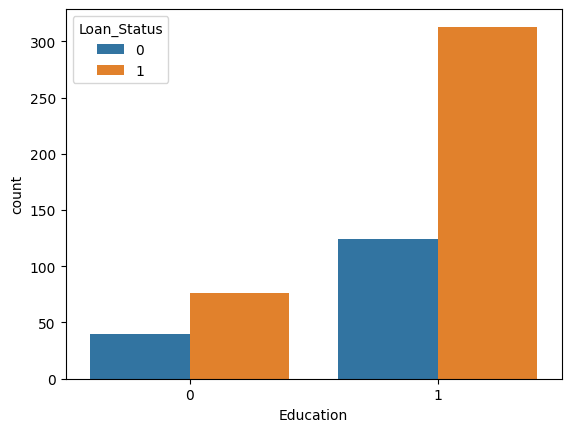

In [ ]:
sns.countplot(x='Education', hue='Loan_Status',data=data)

In [ ]:
X = data.drop('Loan_Status',axis=1)

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [ ]:
Y = data['Loan_Status']

In [ ]:
Y

,Loan_Status
1,0
2,1
3,1
4,1
5,1
...,...
609,1
610,1
611,1
612,1


**Feature Scaling**

In [ ]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,2
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,2
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,2
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,2
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,2


**Splitting dataset into traning set and training set and applying K-fold validation**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

model_df = {}

def model_val(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"{model} accuracy is {accuracy}")
    score = cross_val_score(model, X, Y, cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[str(model)] = round(np.mean(score) * 100, 2)


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model_val(model, X, Y)


LogisticRegression() accuracy is 0.7927927927927928
LogisticRegression() Avg cross val score is 0.802964782964783


In [ ]:
model_df

{'LogisticRegression()': 80.3}

**SVC**

In [ ]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,Y)

SVC() accuracy is 0.8018018018018018
SVC() Avg cross val score is 0.7938902538902539


In [ ]:
model_df

{'LogisticRegression()': 80.3, 'SVC()': 79.39}

**Decision tree classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,Y)

DecisionTreeClassifier() accuracy is 0.6936936936936937
DecisionTreeClassifier() Avg cross val score is 0.707043407043407


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_val(model,X,Y)

RandomForestClassifier() accuracy is 0.7747747747747747
RandomForestClassifier() Avg cross val score is 0.7866339066339066


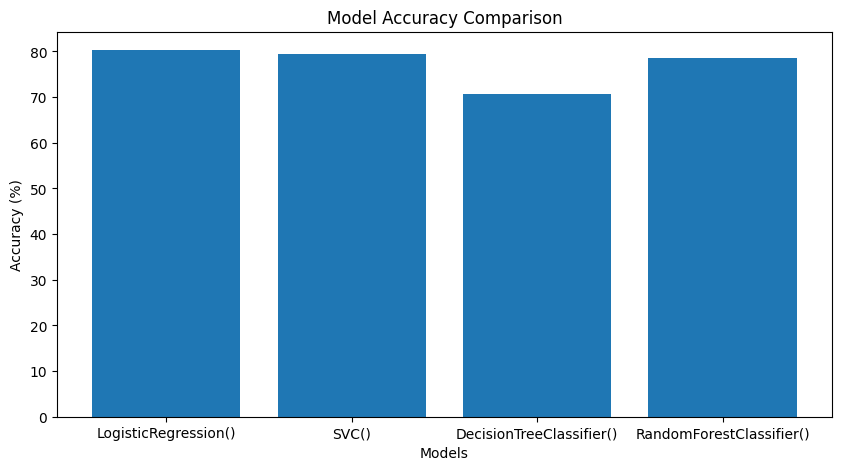

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(model_df.keys(), model_df.values())
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.show()


**Hyperparameter tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":['liblinear']}

In [ ]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,n_iter=20,cv=5,verbose=True)

In [ ]:
rs_log_reg.fit(X,Y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_score_

0.802964782964783

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

**SVC**

In [ ]:
svc_grid= {'C':[0.25,0.50,0.75,1],"kernel":['linear']}

In [ ]:
rs_svc=RandomizedSearchCV(svm.SVC(),param_distributions=svc_grid,
                          n_iter=20,
                          cv=5,
                          verbose=True)

In [ ]:
rs_svc.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [ ]:
rs_svc.best_score_

0.8066011466011467

In [ ]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

Random Forest

In [ ]:
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
rf_grid = {'n_estimators':np.arange(10,1000,10),
 'max_features':['auto','sqrt'],
 'max_depth':[None,3,5,10,20,30],
 'min_samples_split':[2,5,20,50,100],
 'min_samples_leaf':[1,2,5,1]
 }

In [ ]:
rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         n_iter=20,
                          cv=5,
                          verbose=True)

In [ ]:
rs_rf.fit(X,Y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 1],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [ ]:
rs_rf.best_score_

0.8066175266175266

In [ ]:
rs_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 50,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

**Save Model**

In [ ]:
X=data.drop('Loan_Status',axis=1)
Y=data['Loan_Status']

In [ ]:
classifier = svm.SVC(kernel='linear',C= 0.25)
classifier.fit(X,Y)

SVC(C=0.25, kernel='linear')

In [ ]:
import joblib

In [ ]:
joblib.dump(classifier,"Loan_status_predict")

['Loan_status_predict']

In [ ]:
model= joblib.load('Loan_status_predict')

In [ ]:
import pandas as pd
df = pd.DataFrame({
   'Gender': 1,
    'Married': 0,
    'Dependents': 0,
    'Education': 1,
    'Self_Employed': 0,
    'ApplicantIncome': 1853,
    'CoapplicantIncome': 2840,
    'LoanAmount': 114,
    'Loan_Amount_Term': 360,
    'Credit_History': 1,
    'Property_Area': 1
},index=[0])

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,1853,2840,114,360,1,1


In [ ]:
result=model.predict(df)

In [ ]:
if result==1:
  print("Loan Approved!!")
else:
  print("Loan Rejected!!")

Loan Approved!!


#REQUIREMENTS


In [ ]:
accuracy_score(Y,model.predict(X))

0.8010849909584087

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,model.predict(X))
print(cm)


[[ 60 104]
 [  6 383]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y,model.predict(X))
print(accuracy)

0.8010849909584087


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(Y,model.predict(X))
print(recall)

0.9845758354755784


In [ ]:
tn, fp, fn, tp = confusion_matrix(Y,model.predict(X)).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
specificity = tn / (tn + fp)

True Negatives:  60
False Positives:  104
False Negatives:  6
True Positives:  383


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(Y,model.predict(X))
print(precision)

0.7864476386036962


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(Y,model.predict(X))
print(f1)

0.8744292237442922


In [ ]:
fpr = fp / (fp + tn)
fpr

0.6341463414634146

In [ ]:
fnr = fn / (fn + tp)
fnr

0.015424164524421594

In [ ]:
import numpy as np
residuals = Y - model.predict(X)
residuals.describe()

,Loan_Status
count,553.000000
mean,-0.177215
std,0.409650
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y,model.predict(X))
print(mae)

0.19891500904159132


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y,model.predict(X))
print(mse)

0.19891500904159132


In [ ]:
rmse = mean_squared_error(Y,model.predict(X),squared=False)
print(rmse)

0.44599888905869634


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


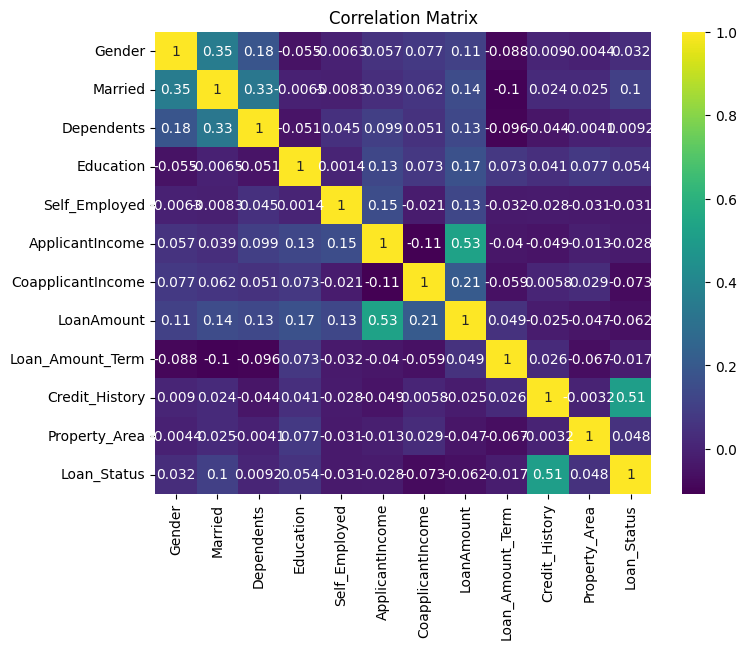

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

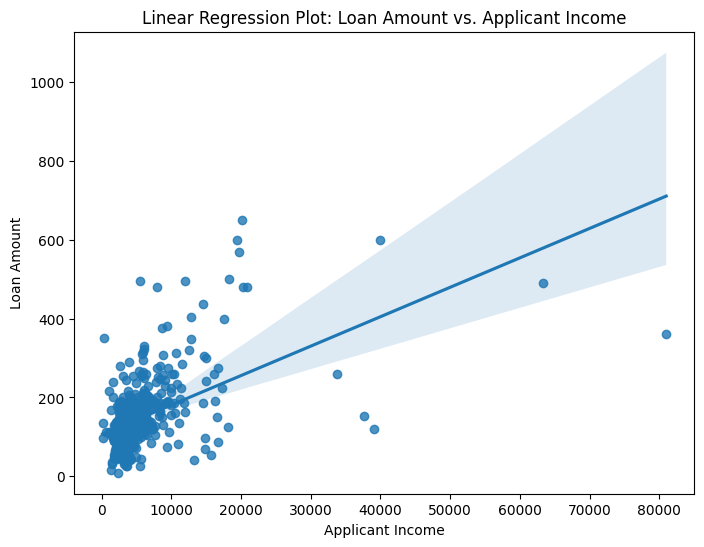

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='ApplicantIncome', y='LoanAmount', data=data)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Linear Regression Plot: Loan Amount vs. Applicant Income')
plt.show()


from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model = SVC(C=0.25, kernel='linear', probability=True)  

model.fit(X_train, Y_train)  

# Now you can use predict_proba
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

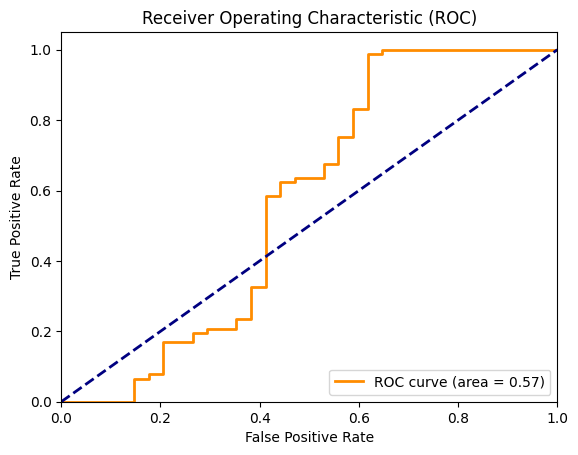

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Assuming X and Y are your features and target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train your SVM model (make sure it has probability=True)
model = svm.SVC(kernel='linear', C=0.25, probability=True)
model.fit(X_train, Y_train)

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()